In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import requests
import json

In [ ]:
samples = []
for i in range(21):
    filename = f'movies_sample_{i}.csv'
    print('Importing ' + filename)
    sample = pd.read_csv(filename)
    samples.append(sample)

Importing movies_sample_0.csv
Importing movies_sample_1.csv
Importing movies_sample_2.csv
Importing movies_sample_3.csv
Importing movies_sample_4.csv
Importing movies_sample_5.csv
Importing movies_sample_6.csv
Importing movies_sample_7.csv
Importing movies_sample_8.csv
Importing movies_sample_9.csv
Importing movies_sample_10.csv
Importing movies_sample_11.csv
Importing movies_sample_12.csv
Importing movies_sample_13.csv
Importing movies_sample_14.csv
Importing movies_sample_15.csv
Importing movies_sample_16.csv
Importing movies_sample_17.csv
Importing movies_sample_18.csv
Importing movies_sample_19.csv
Importing movies_sample_20.csv


In [ ]:
movies = pd.concat(samples)
# movies.reset_index().drop(columns=['index'], axis=1, inplace=True)
movies = movies.reset_index()
print(movies.shape)
movies.head()

(235875, 14)


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue
0,0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019.0,NaN,NaN,"Action,Crime",611205.0,de,0.0,0.0
1,1,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,NaN,60.0,NaN,607290.0,es,0.0,0.0
2,2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",11232.0,en,48000000.0,76019048.0
3,3,tt0067683,movie,Workers '71: Nothing About Us Without Us,Robotnicy 1971 - Nic o nas bez nas,0,2006.0,NaN,47.0,Documentary,363560.0,pl,0.0,0.0
4,4,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122.0,Drama,299782.0,en,12000000.0,0.0


In [ ]:
tmp = pd.read_csv('./../title_basic_movies.csv')
print(tmp.shape)

# Filter to only movies between 2000 and 2019
movies_df = tmp[(tmp.startYear >= 2000) & (tmp.startYear <= 2019)]
print(movies_df.shape)

(621579, 9)
(235875, 9)


# Languages

In [ ]:
# Total movies with non-null language
movies[~movies.og_language.isna()].shape

(123684, 14)

In [ ]:
url = 'https://api.themoviedb.org/3/configuration/languages?api_key=a07e22bc18f5cb106bfe4cc1f83ad8ed'
r = requests.get(url)
data = r.json()
data[:5]

[{'iso_639_1': 'xx', 'english_name': 'No Language', 'name': 'No Language'},
 {'iso_639_1': 'aa', 'english_name': 'Afar', 'name': ''},
 {'iso_639_1': 'af', 'english_name': 'Afrikaans', 'name': 'Afrikaans'},
 {'iso_639_1': 'ak', 'english_name': 'Akan', 'name': ''},
 {'iso_639_1': 'an', 'english_name': 'Aragonese', 'name': ''}]

In [ ]:
lang_codes = dict()
for entry in data:
    code, name = entry['iso_639_1'], entry['english_name']
    lang_codes[code] = name

In [ ]:
n = 20
exclude_na = True
top_lang = movies.og_language.value_counts(dropna=exclude_na).index[:n].to_list()
print(top_lang)

top_lang_names = [lang_codes[code] for code in top_lang]
print(top_lang_names)

['en', 'es', 'fr', 'ja', 'de', 'zh', 'pt', 'it', 'hi', 'ko', 'ru', 'ml', 'tr', 'ta', 'tl', 'nl', 'te', 'cn', 'fa', 'id']
['English', 'Spanish', 'French', 'Japanese', 'German', 'Mandarin', 'Portuguese', 'Italian', 'Hindi', 'Korean', 'Russian', 'Malayalam', 'Turkish', 'Tamil', 'Tagalog', 'Dutch', 'Telugu', 'Cantonese', 'Persian', 'Indonesian']


In [ ]:
movies_top_lang = movies[movies.og_language.isin(top_lang)]

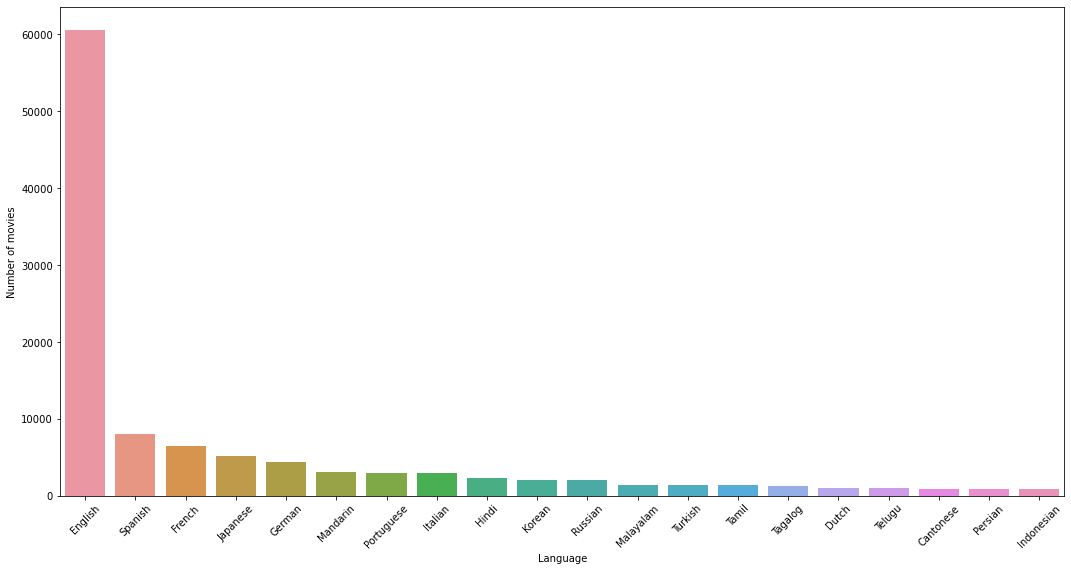

In [ ]:
# Top 20 languages

plt.figure(figsize=(18, 9))

f = sns.countplot(data=movies_top_lang, x="og_language", order=movies_top_lang.og_language.value_counts(dropna=exclude_na).index)
f.set_xticklabels(top_lang_names)

plt.tick_params(axis='x', rotation=45)
plt.xlabel('Language')
plt.ylabel('Number of movies')

plt.show()

# Budget

In [ ]:
# Total movies with non-null budget
movies[~movies.budget.isna()].shape

(123684, 14)

In [ ]:
# Total movies with budget > 0
movies[movies.budget > 0].shape

(14345, 14)

In [ ]:
movies_w_budget = movies[movies.budget > 0]

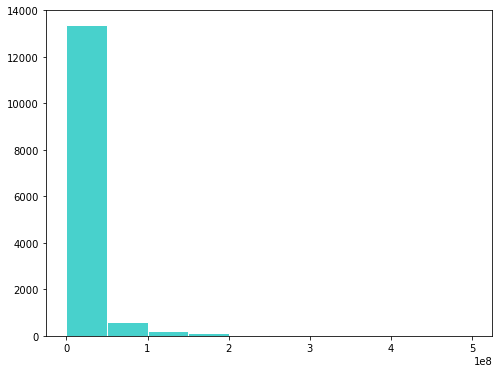

In [ ]:
plt.figure(figsize=(8, 6))

plt.hist(movies_w_budget['budget'], color='mediumturquoise', edgecolor='white')

plt.show()

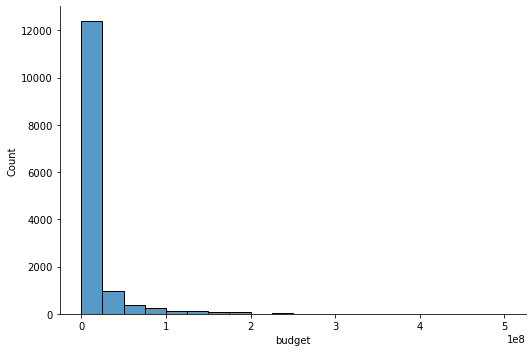

In [ ]:
# plt.figure(figsize=(12, 9))

sns.displot(movies_w_budget, x="budget", bins=20, height=5, aspect=1.5)

plt.show()

Visualize movies with budget within 25th - 75th percentile

In [ ]:
low, high = np.quantile(movies_w_budget.budget, [0.25, 0.75])
low, high

(89000.0, 10000000.0)

In [ ]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

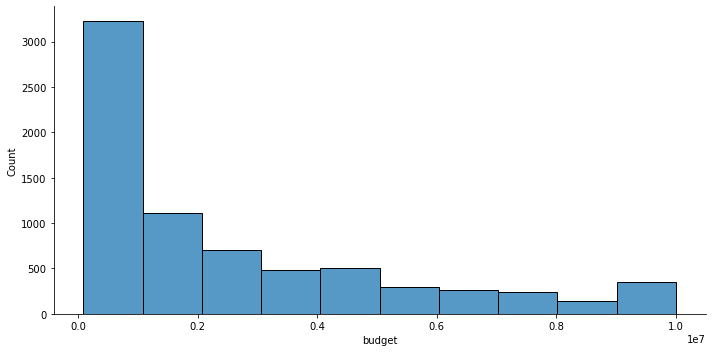

In [ ]:
# plt.figure(figsize=(12, 9))

f = sns.displot(movies_w_budget[(movies_w_budget.budget >= low) & (movies_w_budget.budget <= high)],
            x="budget", bins=10, height=5, aspect=2)

# f.set_xticklabels(np.arange(1, 11))

plt.show()

# Revenue

In [ ]:
# Total movies with non-null revenue
movies[~movies.revenue.isna()].shape

(123684, 14)

In [ ]:
# Total movies with revenue > 0
movies[movies.revenue > 0].shape

(8952, 14)

In [ ]:
movies_w_revenue = movies[movies.revenue > 0]

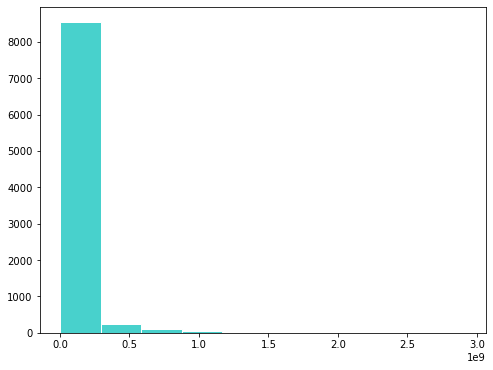

In [ ]:
plt.figure(figsize=(8, 6))

plt.hist(movies_w_revenue['revenue'], color='mediumturquoise', edgecolor='white')

plt.show()

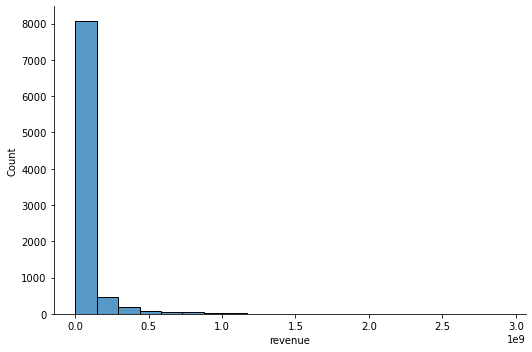

In [ ]:
# plt.figure(figsize=(12, 9))

sns.displot(movies_w_revenue, x="revenue", bins=20, height=5, aspect=1.5)

plt.show()

Visualize movies with revenue within 25th - 75th percentile

In [ ]:
low, high = np.quantile(movies_w_revenue.revenue, [0.25, 0.75])
low, high

(409068.5, 38182705.25)

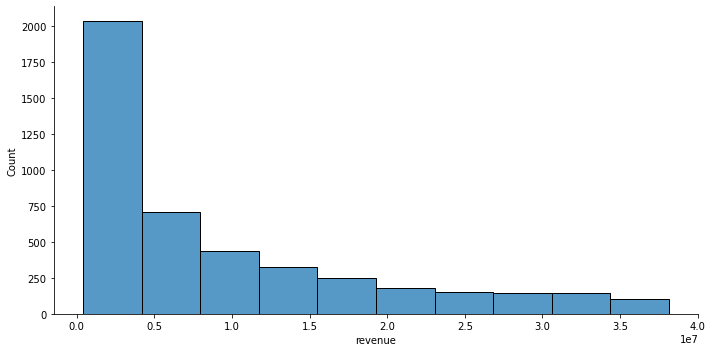

In [ ]:
# plt.figure(figsize=(12, 9))

f = sns.displot(movies_w_revenue[(movies_w_revenue.revenue >= low) & (movies_w_revenue.revenue <= high)],
            x="revenue", bins=10, height=5, aspect=2)

# f.set_xticklabels(np.arange(1, 11))

plt.show()

# Budget & revenue

In [ ]:
# Total movies with budget > 0 and revenue > 0
movies[(movies.budget > 0) & (movies.revenue > 0)].shape

(5747, 14)

In [ ]:
# English speaking movies with budget, revenue > 0
movies[(movies.budget > 0) & (movies.revenue > 0) & (movies.og_language == 'en')].shape

(3967, 14)

In [ ]:
# Same but no animation
tmp = movies[(movies.budget > 0) & (movies.revenue > 0) & (movies.og_language == 'en')]
df = tmp[~tmp.genres.str.contains('Animation')]
print(df.shape)
df.head()

(3721, 14)


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue
2,2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",11232.0,en,48000000.0,76019048.0
40,40,tt0118589,movie,Glitter,Glitter,0,2001.0,NaN,104.0,"Drama,Music,Romance",10696.0,en,22000000.0,5271666.0
64,64,tt0120467,movie,Vulgar,Vulgar,0,2000.0,NaN,87.0,"Crime,Drama,Thriller",19085.0,en,120000.0,14904.0
71,71,tt0120667,movie,Fantastic Four,Fantastic Four,0,2005.0,NaN,106.0,"Action,Adventure,Fantasy",9738.0,en,100000000.0,333535934.0
73,73,tt0120679,movie,Frida,Frida,0,2002.0,NaN,123.0,"Biography,Drama,Romance",1360.0,en,12000000.0,56298474.0


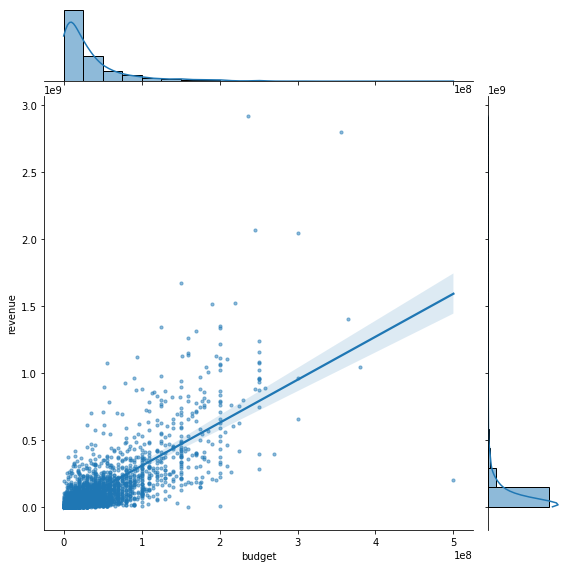

slope=3.2142682713408535, intercept=-15480231.739405423, r_value=0.7592876403095509, p_value=0.0, std_err=0.045173144474450054


In [ ]:
f = sns.jointplot(data=df, x='budget', y='revenue', kind='reg',
                  height=8, marginal_kws=dict(bins=20),
                  joint_kws={'scatter_kws':dict(alpha=0.5, s=10)})

# for ax, feature in zip(g.axes.flat, g.col_names):
#     r, pvalue = spearmanr(df['petal_length'], df[feature])
#     ax.collections[0].set_label(f'Spearman = {r:.2f}')
#     ax.legend()
# r, p = stats.spearmanr(df['budget'], df['revenue'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df['budget'], df['revenue'])
# plt.annotate('r=%.2f' % r_value, xy=(0, 0), xytext=(2,2) , textcoords ="offset points", )

plt.show()

print(f'slope={slope}, intercept={intercept}, r_value={r_value}, p_value={p_value}, std_err={std_err}')

In [ ]:
df[df.budget > 400000000]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio
116150,1150,tt2211240,movie,Dead,Dead,0,2013.0,NaN,104.0,Drama,168626.0,en,500000000.0,201103001.0,2.486288


# There seem to be data inconsistencies here

In [ ]:
df[(df.budget == df.budget.min()) | (df.budget == df.budget.max())]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue
116150,1150,tt2211240,movie,Dead,Dead,0,2013.0,NaN,104.0,Drama,168626.0,en,500000000.0,201103001.0
145717,7717,tt3458760,movie,The Lucky Man,The Lucky Man,0,2017.0,NaN,98.0,"Action,Drama,Sci-Fi",413138.0,en,1.0,24.0
180989,8489,tt5396900,movie,Sesh Sangbad: The Last News,Sesh Sangbad: The Last News,0,2016.0,NaN,120.0,"Drama,Thriller",518259.0,en,1.0,2.0


In [ ]:
df[df.budget < 100]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue
809,809,tt0196106,movie,MVP: Most Valuable Primate,MVP: Most Valuable Primate,0,2000.0,NaN,93.0,"Comedy,Family,Sport",32834.0,en,4.0,1.0
4818,4818,tt0276977,movie,Gang Tapes,Gang Tapes,0,2001.0,NaN,91.0,"Crime,Drama",60828.0,en,50.0,60.0
15299,3799,tt0387925,movie,Chestnut: Hero of Central Park,Chestnut: Hero of Central Park,0,2004.0,NaN,87.0,"Comedy,Drama,Family",34672.0,en,6.0,10.0
16887,5387,tt0404802,movie,The Notorious Bettie Page,The Notorious Bettie Page,0,2005.0,NaN,91.0,"Biography,Drama",15402.0,en,90.0,1410778.0
19267,7767,tt0428303,movie,Cavite,Cavite,0,2005.0,NaN,80.0,Thriller,67238.0,en,7.0,70.0
22550,11050,tt0459272,movie,Elephant Tales,Elephant Tales,0,2006.0,NaN,92.0,"Action,Adventure,Family",198701.0,en,7.0,33.0
23536,536,tt0468516,movie,My Brother's War,My Brother's War,0,2005.0,NaN,115.0,"Drama,Romance,War",174008.0,en,40.0,300.0
23697,697,tt0469691,movie,Pavee Lackeen: The Traveller Girl,Pavee Lackeen: The Traveller Girl,0,2005.0,NaN,88.0,Drama,31450.0,en,60.0,90.0
23903,903,tt0471013,movie,A Long Road,A Long Road,0,2005.0,NaN,88.0,"Drama,Music",473876.0,en,15.0,7.0
26796,3796,tt0497972,movie,Sex and Death 101,Sex and Death 101,0,2007.0,NaN,117.0,"Comedy,Drama,Fantasy",14424.0,en,5.0,1.0


In [ ]:
# This is definitely not true
df[df.budget == df.budget.max()]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue
116150,1150,tt2211240,movie,Dead,Dead,0,2013.0,NaN,104.0,Drama,168626.0,en,500000000.0,201103001.0


In [ ]:
df[df.revenue == df.revenue.max()]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue
26999,3999,tt0499549,movie,Avatar,Avatar,0,2009.0,NaN,162.0,"Action,Adventure,Fantasy",19995.0,en,237000000.0,2.920357e+09


In [ ]:
df[df.tconst == 'tt0499549'].budget.values[0] / df[df.tconst == 'tt0499549'].revenue.values[0]

0.08115445453647227

In [ ]:
df[df.tconst == 'tt0499549'].revenue.values[0] - df[df.tconst == 'tt4154796'].revenue.values[0] # Avatar - Endgame

122556690.0

In [ ]:
df[df.startYear == 2019].sort_values(by='revenue', ascending=False)[:20]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue
159851,10351,tt4154796,movie,Avengers: Endgame,Avengers: Endgame,0,2019.0,NaN,181.0,"Action,Adventure,Drama",299534.0,en,356000000.0,2.797801e+09
195777,277,tt6320628,movie,Spider-Man: Far from Home,Spider-Man: Far from Home,0,2019.0,NaN,129.0,"Action,Adventure,Sci-Fi",429617.0,en,160000000.0,1.131928e+09
159847,10347,tt4154664,movie,Captain Marvel,Captain Marvel,0,2019.0,NaN,123.0,"Action,Adventure,Sci-Fi",299537.0,en,152000000.0,1.128276e+09
209673,2673,tt7286456,movie,Joker,Joker,0,2019.0,NaN,122.0,"Crime,Drama,Thriller",475557.0,en,55000000.0,1.074251e+09
127195,695,tt2527338,movie,Star Wars: Episode IX - The Rise of Skywalker,Star Wars: Episode IX - The Rise of Skywalker,0,2019.0,NaN,141.0,"Action,Adventure,Fantasy",181812.0,en,250000000.0,1.074144e+09
192960,8960,tt6139732,movie,Aladdin,Aladdin,0,2019.0,NaN,128.0,"Adventure,Comedy,Family",420817.0,en,183000000.0,1.047612e+09
218232,11232,tt7975244,movie,Jumanji: The Next Level,Jumanji: The Next Level,0,2019.0,NaN,123.0,"Action,Adventure,Comedy",512200.0,en,125000000.0,8.000597e+08
203564,8064,tt6806448,movie,Fast & Furious Presents: Hobbs & Shaw,Fast & Furious Presents: Hobbs & Shaw,0,2019.0,NaN,137.0,"Action,Adventure,Thriller",384018.0,en,200000000.0,7.600990e+08
170439,9439,tt4777008,movie,Maleficent: Mistress of Evil,Maleficent: Mistress of Evil,0,2019.0,NaN,119.0,"Adventure,Family,Fantasy",420809.0,en,185000000.0,4.917301e+08
210462,3462,tt7349950,movie,It Chapter Two,It Chapter Two,0,2019.0,NaN,169.0,"Drama,Fantasy,Horror",474350.0,en,79000000.0,4.731225e+08


In [ ]:
df[df.startYear == 2018].sort_values(by='revenue', ascending=False)[:20]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue
159850,10350,tt4154756,movie,Avengers: Infinity War,Avengers: Infinity War,0,2018.0,NaN,149.0,"Action,Adventure,Sci-Fi",299536.0,en,300000000.0,2.046240e+09
97438,5438,tt1825683,movie,Black Panther,Black Panther,0,2018.0,NaN,134.0,"Action,Adventure,Sci-Fi",284054.0,en,200000000.0,1.347598e+09
172048,11048,tt4881806,movie,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,0,2018.0,NaN,128.0,"Action,Adventure,Sci-Fi",351286.0,en,170000000.0,1.310466e+09
77519,8519,tt1477834,movie,Aquaman,Aquaman,0,2018.0,NaN,143.0,"Action,Adventure,Fantasy",297802.0,en,160000000.0,1.148528e+09
92234,234,tt1727824,movie,Bohemian Rhapsody,Bohemian Rhapsody,0,2018.0,NaN,134.0,"Biography,Drama,Music",424694.0,en,52000000.0,8.940275e+08
60041,2541,tt1270797,movie,Venom,Venom,0,2018.0,NaN,112.0,"Action,Adventure,Sci-Fi",335983.0,en,116000000.0,8.550140e+08
172647,147,tt4912910,movie,Mission: Impossible - Fallout,Mission: Impossible - Fallout,0,2018.0,NaN,147.0,"Action,Adventure,Thriller",353081.0,en,178000000.0,7.916574e+08
181648,9148,tt5463162,movie,Deadpool 2,Deadpool 2,0,2018.0,NaN,119.0,"Action,Adventure,Comedy",383498.0,en,110000000.0,7.863656e+08
159159,9659,tt4123430,movie,Fantastic Beasts: The Crimes of Grindelwald,Fantastic Beasts: The Crimes of Grindelwald,0,2018.0,NaN,134.0,"Adventure,Family,Fantasy",338952.0,en,200000000.0,6.533559e+08
175588,3088,tt5095030,movie,Ant-Man and the Wasp,Ant-Man and the Wasp,0,2018.0,NaN,118.0,"Action,Adventure,Comedy",363088.0,en,140000000.0,6.226741e+08


In [ ]:
df[df.startYear == 2017].sort_values(by='revenue', ascending=False)[:20]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue
127194,694,tt2527336,movie,Star Wars: Episode VIII - The Last Jedi,Star Wars: Episode VIII - The Last Jedi,0,2017.0,NaN,152.0,"Action,Adventure,Fantasy",181808.0,en,200000000.0,1.332699e+09
131894,5394,tt2771200,movie,Beauty and the Beast,Beauty and the Beast,0,2017.0,NaN,129.0,"Adventure,Family,Fantasy",321612.0,en,160000000.0,1.263521e+09
168128,7128,tt4630562,movie,The Fate of the Furious,The Fate of the Furious,0,2017.0,NaN,136.0,"Action,Crime,Thriller",337339.0,en,250000000.0,1.238765e+09
118883,3883,tt2283362,movie,Jumanji: Welcome to the Jungle,Jumanji: Welcome to the Jungle,0,2017.0,NaN,119.0,"Action,Adventure,Comedy",353486.0,en,90000000.0,9.621022e+08
117648,2648,tt2250912,movie,Spider-Man: Homecoming,Spider-Man: Homecoming,0,2017.0,NaN,133.0,"Action,Adventure,Sci-Fi",315635.0,en,175000000.0,8.801669e+08
155209,5709,tt3896198,movie,Guardians of the Galaxy Vol. 2,Guardians of the Galaxy Vol. 2,0,2017.0,NaN,136.0,"Action,Adventure,Comedy",283995.0,en,200000000.0,8.637561e+08
146642,8642,tt3501632,movie,Thor: Ragnarok,Thor: Ragnarok,0,2017.0,NaN,130.0,"Action,Adventure,Comedy",284053.0,en,180000000.0,8.539771e+08
21612,10112,tt0451279,movie,Wonder Woman,Wonder Woman,0,2017.0,NaN,141.0,"Action,Adventure,Fantasy",297762.0,en,149000000.0,8.228543e+08
95692,3692,tt1790809,movie,Pirates of the Caribbean: Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales,0,2017.0,NaN,129.0,"Action,Adventure,Fantasy",166426.0,en,230000000.0,7.948618e+08
71042,2042,tt1396484,movie,It,It,0,2017.0,NaN,135.0,Horror,346364.0,en,35000000.0,7.018426e+08


# Budget & revenue by year

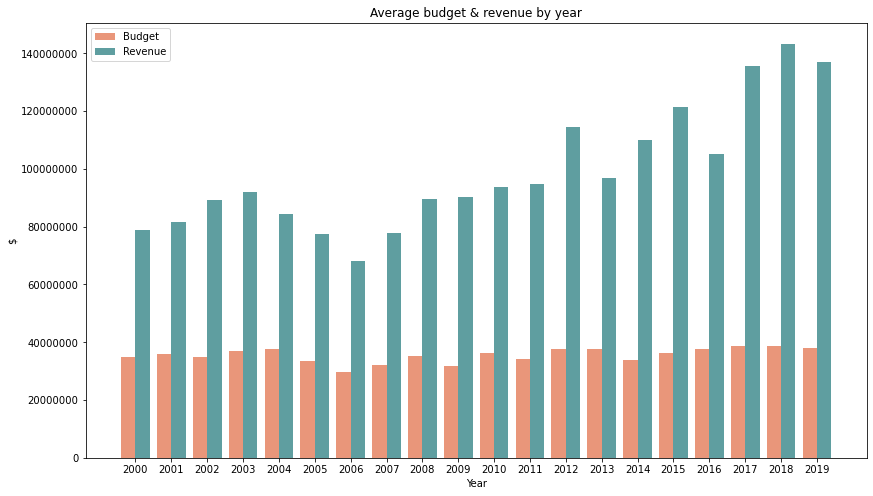

In [ ]:
df_year_mean = df.groupby('startYear').mean()

f = plt.figure(figsize=(14, 8))

plt.bar(df_year_mean.index.astype('int64'), df_year_mean.budget,
        color='darksalmon', width=-0.4, align='edge', label='Budget')
plt.bar(df_year_mean.index.astype('int64'), df_year_mean.revenue,
        color='cadetblue', width=0.4, align='edge', label='Revenue')

plt.xticks(ticks=df_year_mean.index.astype('int64'), labels=df_year_mean.index.astype('int64'))
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

# fmt = '${x:,.0f}'
# tick = mtick.StrMethodFormatter(fmt)
# f.axes[0].set_major_formatter(tick)

plt.xlabel('Year')
plt.ylabel('$')
plt.title('Average budget & revenue by year')

plt.legend()
plt.show()

# Budget & revenue by genre

In [ ]:
df_exp = df.assign(genres_sep=df['genres'].str.split(',')).explode('genres_sep')
print(df_exp.shape)
df_exp.head()

(9443, 15)


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,genres_sep
2,2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",11232.0,en,48000000.0,76019048.0,Comedy
2,2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",11232.0,en,48000000.0,76019048.0,Fantasy
2,2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",11232.0,en,48000000.0,76019048.0,Romance
40,40,tt0118589,movie,Glitter,Glitter,0,2001.0,NaN,104.0,"Drama,Music,Romance",10696.0,en,22000000.0,5271666.0,Drama
40,40,tt0118589,movie,Glitter,Glitter,0,2001.0,NaN,104.0,"Drama,Music,Romance",10696.0,en,22000000.0,5271666.0,Music


In [ ]:
df_genre_mean = df_exp.groupby('genres_sep').mean().sort_values(by='revenue', ascending=False)
df_genre_mean.reset_index()

,genres_sep,index,isAdult,startYear,endYear,runtimeMinutes,tmdb_id,budget,revenue
0,Adventure,5615.683043,0.0,2010.177496,NaN,114.009509,120467.833597,8.518421e+07,2.705570e+08
1,Sci-Fi,5723.710526,0.0,2010.253289,NaN,111.174342,116977.164474,7.814155e+07,2.469114e+08
2,Fantasy,5434.201278,0.0,2009.856230,NaN,110.670927,112431.300319,6.563857e+07,1.960559e+08
3,Action,5550.382411,0.0,2010.258893,NaN,111.459486,130720.902174,6.687234e+07,1.896937e+08
4,Family,5719.088785,0.0,2008.976636,NaN,103.728972,108477.387850,5.612011e+07,1.607881e+08
5,Musical,6050.096774,0.0,2009.161290,NaN,109.096774,163675.838710,3.441816e+07,1.110447e+08
6,Thriller,5539.500000,0.0,2009.887538,NaN,105.348554,130773.185410,3.163590e+07,8.837384e+07
7,Comedy,5355.400775,0.0,2008.962791,NaN,101.559098,113317.351938,2.882548e+07,7.568564e+07
8,Mystery,5361.788177,0.0,2009.539409,NaN,105.486420,125745.327586,2.584002e+07,7.530122e+07
9,Crime,5397.284530,0.0,2009.074586,NaN,107.595568,120977.062155,2.981048e+07,6.746865e+07


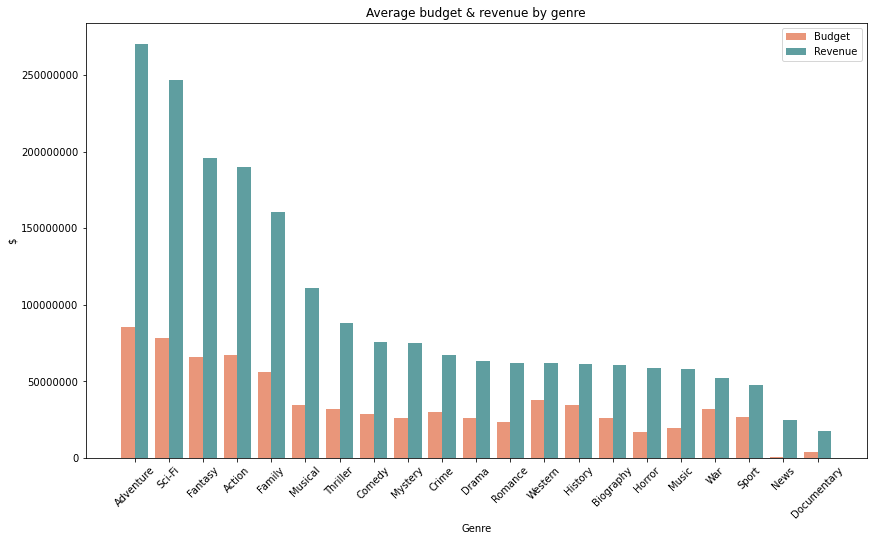

In [ ]:
f = plt.figure(figsize=(14, 8))

plt.bar(df_genre_mean.index, df_genre_mean.budget,
        color='darksalmon', width=-0.4, align='edge', label='Budget')
plt.bar(df_genre_mean.index, df_genre_mean.revenue,
        color='cadetblue', width=0.4, align='edge', label='Revenue')

# plt.xticks(ticks=df_year_mean.index.astype('int64'), labels=df_year_mean.index.astype('int64'))
plt.tick_params(axis='x', rotation=45)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

# fmt = '${x:,.0f}'
# tick = mtick.StrMethodFormatter(fmt)
# f.axes[0].set_major_formatter(tick)

plt.xlabel('Genre')
plt.ylabel('$')
plt.title('Average budget & revenue by genre')

plt.legend()
plt.show()

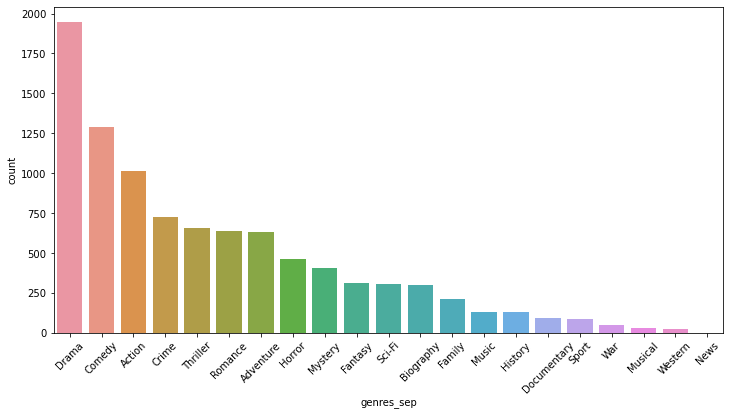

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df_exp, x='genres_sep', order=df_exp.genres_sep.value_counts().index)

plt.tick_params(axis='x', rotation=45)

plt.show()

In [ ]:
df['ratio'] = df.budget / df.revenue

In [ ]:
df['ROI'] = df.revenue / df.budget

In [ ]:
df.ROI.describe()

count     3721.000000
mean        20.556586
std        550.518582
min          0.000001
25%          0.580645
50%          1.694118
75%          3.479580
max      26881.720430
Name: ROI, dtype: float64

In [ ]:
df

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI
2,2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",11232.0,en,48000000.0,76019048.0,0.631421,1.583730
40,40,tt0118589,movie,Glitter,Glitter,0,2001.0,NaN,104.0,"Drama,Music,Romance",10696.0,en,22000000.0,5271666.0,4.173254,0.239621
64,64,tt0120467,movie,Vulgar,Vulgar,0,2000.0,NaN,87.0,"Crime,Drama,Thriller",19085.0,en,120000.0,14904.0,8.051530,0.124200
71,71,tt0120667,movie,Fantastic Four,Fantastic Four,0,2005.0,NaN,106.0,"Action,Adventure,Fantasy",9738.0,en,100000000.0,333535934.0,0.299818,3.335359
73,73,tt0120679,movie,Frida,Frida,0,2002.0,NaN,123.0,"Biography,Drama,Romance",1360.0,en,12000000.0,56298474.0,0.213150,4.691540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227958,9458,tt8946378,movie,Knives Out,Knives Out,0,2019.0,NaN,130.0,"Comedy,Crime,Drama",546554.0,en,40000000.0,309232797.0,0.129352,7.730820
229934,11434,tt9134216,movie,Playing with Fire,Playing with Fire,0,2019.0,NaN,96.0,"Comedy,Family",554241.0,en,29900000.0,44400000.0,0.673423,1.484950
231187,1187,tt9285882,movie,Blue Story,Blue Story,0,2019.0,NaN,91.0,"Crime,Drama,Musical",621191.0,en,1600000.0,5750000.0,0.278261,3.593750
231673,1673,tt9354944,movie,Jexi,Jexi,0,2019.0,NaN,84.0,"Comedy,Romance,Sci-Fi",620725.0,en,5000000.0,9341824.0,0.535227,1.868365


In [ ]:
df[df.ROI >= 246]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI
13816,2316,tt0374102,movie,Open Water,Open Water,0,2003.0,NaN,79.0,"Adventure,Drama,Horror",83.0,en,130000.0,54667954.0,0.002378,420.522723
15635,4135,tt0390521,movie,Super Size Me,Super Size Me,0,2004.0,NaN,100.0,Documentary,9372.0,en,65000.0,28575078.0,0.002275,439.616585
15641,4141,tt0390538,movie,Tarnation,Tarnation,0,2003.0,NaN,88.0,"Biography,Documentary",1435.0,en,218.0,1162014.0,0.000188,5330.339450
16887,5387,tt0404802,movie,The Notorious Bettie Page,The Notorious Bettie Page,0,2005.0,NaN,91.0,"Biography,Drama",15402.0,en,90.0,1410778.0,0.000064,15675.311111
28086,5086,tt0790636,movie,Dallas Buyers Club,Dallas Buyers Club,0,2013.0,NaN,117.0,"Biography,Drama",152532.0,en,5000.0,55736588.0,0.000090,11147.317600
31974,8974,tt0893412,movie,From Prada to Nada,From Prada to Nada,0,2011.0,NaN,107.0,"Action,Comedy,Drama",50217.0,en,93.0,2500000.0,0.000037,26881.720430
46731,731,tt11023800,movie,Lungi,Lungi,0,2019.0,NaN,115.0,Drama,1009909.0,en,4.0,10000.0,0.000400,2500.000000
53363,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007.0,NaN,86.0,"Horror,Mystery",23827.0,en,215000.0,194183034.0,0.001107,903.176902
119907,4907,tt2309260,movie,The Gallows,The Gallows,0,2015.0,NaN,81.0,"Horror,Mystery,Thriller",299245.0,en,100000.0,42664410.0,0.002344,426.644100
123401,8401,tt2389344,movie,The Mistress,The Mistress,0,2012.0,NaN,125.0,Drama,134380.0,en,22361.0,5876918.0,0.003805,262.819999


In [ ]:
df3 = pd.merge(df, ratings, left_on='tconst', right_on='tconst', how='left')
df3 = df3[df3.numVotes > 125]
df3

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes
0,2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",11232.0,en,48000000.0,76019048.0,0.631421,1.583730,6.4,84717.0
1,40,tt0118589,movie,Glitter,Glitter,0,2001.0,NaN,104.0,"Drama,Music,Romance",10696.0,en,22000000.0,5271666.0,4.173254,0.239621,2.3,23564.0
2,64,tt0120467,movie,Vulgar,Vulgar,0,2000.0,NaN,87.0,"Crime,Drama,Thriller",19085.0,en,120000.0,14904.0,8.051530,0.124200,5.2,4137.0
3,71,tt0120667,movie,Fantastic Four,Fantastic Four,0,2005.0,NaN,106.0,"Action,Adventure,Fantasy",9738.0,en,100000000.0,333535934.0,0.299818,3.335359,5.7,329570.0
4,73,tt0120679,movie,Frida,Frida,0,2002.0,NaN,123.0,"Biography,Drama,Romance",1360.0,en,12000000.0,56298474.0,0.213150,4.691540,7.3,89938.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,7668,tt8772262,movie,Midsommar,Midsommar,0,2019.0,NaN,148.0,"Drama,Horror,Mystery",530385.0,en,9000000.0,47980982.0,0.187574,5.331220,7.1,307254.0
3716,9458,tt8946378,movie,Knives Out,Knives Out,0,2019.0,NaN,130.0,"Comedy,Crime,Drama",546554.0,en,40000000.0,309232797.0,0.129352,7.730820,7.9,609899.0
3717,11434,tt9134216,movie,Playing with Fire,Playing with Fire,0,2019.0,NaN,96.0,"Comedy,Family",554241.0,en,29900000.0,44400000.0,0.673423,1.484950,5.1,14856.0
3718,1187,tt9285882,movie,Blue Story,Blue Story,0,2019.0,NaN,91.0,"Crime,Drama,Musical",621191.0,en,1600000.0,5750000.0,0.278261,3.593750,6.2,7228.0


In [ ]:
df3.to_csv('unfiltered_movies_2.csv', index=False)

In [ ]:
df3[df3.ROI >= 246]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes
840,2316,tt0374102,movie,Open Water,Open Water,0,2003.0,NaN,79.0,"Adventure,Drama,Horror",83.0,en,130000.0,54667954.0,0.002378,420.522723,5.8,54050.0
937,4135,tt0390521,movie,Super Size Me,Super Size Me,0,2004.0,NaN,100.0,Documentary,9372.0,en,65000.0,28575078.0,0.002275,439.616585,7.2,108792.0
938,4141,tt0390538,movie,Tarnation,Tarnation,0,2003.0,NaN,88.0,"Biography,Documentary",1435.0,en,218.0,1162014.0,0.000188,5330.339450,7.1,6590.0
1001,5387,tt0404802,movie,The Notorious Bettie Page,The Notorious Bettie Page,0,2005.0,NaN,91.0,"Biography,Drama",15402.0,en,90.0,1410778.0,0.000064,15675.311111,6.5,11080.0
1507,5086,tt0790636,movie,Dallas Buyers Club,Dallas Buyers Club,0,2013.0,NaN,117.0,"Biography,Drama",152532.0,en,5000.0,55736588.0,0.000090,11147.317600,7.9,484986.0
1653,8974,tt0893412,movie,From Prada to Nada,From Prada to Nada,0,2011.0,NaN,107.0,"Action,Comedy,Drama",50217.0,en,93.0,2500000.0,0.000037,26881.720430,5.5,15143.0
1988,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007.0,NaN,86.0,"Horror,Mystery",23827.0,en,215000.0,194183034.0,0.001107,903.176902,6.3,238846.0
2929,4907,tt2309260,movie,The Gallows,The Gallows,0,2015.0,NaN,81.0,"Horror,Mystery,Thriller",299245.0,en,100000.0,42664410.0,0.002344,426.644100,4.2,20611.0
2986,8401,tt2389344,movie,The Mistress,The Mistress,0,2012.0,NaN,125.0,Drama,134380.0,en,22361.0,5876918.0,0.003805,262.819999,6.3,363.0


In [ ]:
df.to_csv('unfiltered_movies.csv', index=False)

In [ ]:
df.sort_values(by='revenue')

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI
48780,2780,tt1123372,movie,Cicak-Man,Cicak-Man,0,2006.0,NaN,107.0,"Action,Comedy,Sci-Fi",69767.0,en,492.0,1.000000e+00,492.000000,0.002033
54661,8661,tt11991744,movie,Clouded - A Conspiracy,Clouded - A Conspiracy,0,2014.0,NaN,59.0,Comedy,687789.0,en,500.0,1.000000e+00,500.000000,0.002000
44662,10162,tt10847812,movie,Habitual,Habitual,0,2019.0,NaN,95.0,Horror,886828.0,en,95.0,1.000000e+00,95.000000,0.010526
809,809,tt0196106,movie,MVP: Most Valuable Primate,MVP: Most Valuable Primate,0,2000.0,NaN,93.0,"Comedy,Family,Sport",32834.0,en,4.0,1.000000e+00,4.000000,0.250000
211610,4610,tt7445206,movie,Jericho,Jericho,0,2017.0,NaN,74.0,Action,793634.0,en,1700.0,1.000000e+00,1700.000000,0.000588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13367,1867,tt0369610,movie,Jurassic World,Jurassic World,0,2015.0,NaN,124.0,"Action,Adventure,Sci-Fi",135397.0,en,150000000.0,1.671713e+09,0.089728,11.144755
159850,10350,tt4154756,movie,Avengers: Infinity War,Avengers: Infinity War,0,2018.0,NaN,149.0,"Action,Adventure,Sci-Fi",299536.0,en,300000000.0,2.046240e+09,0.146610,6.820799
126313,11313,tt2488496,movie,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,0,2015.0,NaN,138.0,"Action,Adventure,Sci-Fi",140607.0,en,245000000.0,2.068224e+09,0.118459,8.441729
159851,10351,tt4154796,movie,Avengers: Endgame,Avengers: Endgame,0,2019.0,NaN,181.0,"Action,Adventure,Drama",299534.0,en,356000000.0,2.797801e+09,0.127243,7.858990


In [ ]:
1/246

0.0040650406504065045

In [ ]:
df2 = df[df.ratio > 0.08]
df2

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio
2,2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",11232.0,en,48000000.0,76019048.0,0.631421
40,40,tt0118589,movie,Glitter,Glitter,0,2001.0,NaN,104.0,"Drama,Music,Romance",10696.0,en,22000000.0,5271666.0,4.173254
64,64,tt0120467,movie,Vulgar,Vulgar,0,2000.0,NaN,87.0,"Crime,Drama,Thriller",19085.0,en,120000.0,14904.0,8.051530
71,71,tt0120667,movie,Fantastic Four,Fantastic Four,0,2005.0,NaN,106.0,"Action,Adventure,Fantasy",9738.0,en,100000000.0,333535934.0,0.299818
73,73,tt0120679,movie,Frida,Frida,0,2002.0,NaN,123.0,"Biography,Drama,Romance",1360.0,en,12000000.0,56298474.0,0.213150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227958,9458,tt8946378,movie,Knives Out,Knives Out,0,2019.0,NaN,130.0,"Comedy,Crime,Drama",546554.0,en,40000000.0,309232797.0,0.129352
229934,11434,tt9134216,movie,Playing with Fire,Playing with Fire,0,2019.0,NaN,96.0,"Comedy,Family",554241.0,en,29900000.0,44400000.0,0.673423
231187,1187,tt9285882,movie,Blue Story,Blue Story,0,2019.0,NaN,91.0,"Crime,Drama,Musical",621191.0,en,1600000.0,5750000.0,0.278261
231673,1673,tt9354944,movie,Jexi,Jexi,0,2019.0,NaN,84.0,"Comedy,Romance,Sci-Fi",620725.0,en,5000000.0,9341824.0,0.535227


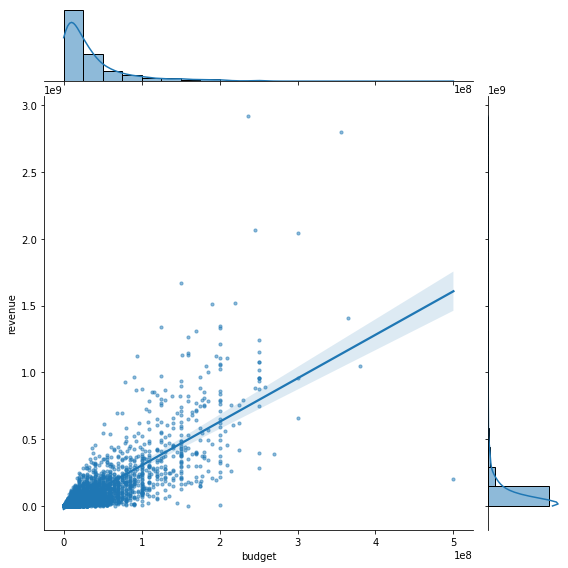

slope=3.2593084259960015, intercept=-22367610.253294215, r_value=0.777252546922637, p_value=0.0, std_err=0.04413953397510051


In [ ]:
f = sns.jointplot(data=df2, x='budget', y='revenue', kind='reg',
                  height=8, marginal_kws=dict(bins=20),
                  joint_kws={'scatter_kws':dict(alpha=0.5, s=10)})

# for ax, feature in zip(g.axes.flat, g.col_names):
#     r, pvalue = spearmanr(df['petal_length'], df[feature])
#     ax.collections[0].set_label(f'Spearman = {r:.2f}')
#     ax.legend()
# r, p = stats.spearmanr(df['budget'], df['revenue'])
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['budget'], df2['revenue'])
# plt.annotate('r=%.2f' % r_value, xy=(0, 0), xytext=(2,2) , textcoords ="offset points", )

plt.show()

print(f'slope={slope}, intercept={intercept}, r_value={r_value}, p_value={p_value}, std_err={std_err}')

In [ ]:
df2[df2.tconst == 'tt2211240']

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio
116150,1150,tt2211240,movie,Dead,Dead,0,2013.0,NaN,104.0,Drama,168626.0,en,500000000.0,201103001.0,2.486288


In [ ]:
ratings = pd.read_csv('./../title_ratings_data.csv')
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1911
1,tt0000002,5.8,256
2,tt0000003,6.5,1714
3,tt0000004,5.6,169
4,tt0000005,6.2,2529
...,...,...,...
1260946,tt9916690,6.5,6
1260947,tt9916720,5.2,256
1260948,tt9916730,8.4,6
1260949,tt9916766,6.8,21


In [ ]:
movies_ratings = pd.merge(df2, ratings, left_on='tconst', right_on='tconst', how='left')

In [ ]:
movies_ratings[movies_ratings.numVotes > 5000]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,averageRating,numVotes
0,2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",11232.0,en,48000000.0,76019048.0,0.631421,6.4,84717.0
1,40,tt0118589,movie,Glitter,Glitter,0,2001.0,NaN,104.0,"Drama,Music,Romance",10696.0,en,22000000.0,5271666.0,4.173254,2.3,23564.0
3,71,tt0120667,movie,Fantastic Four,Fantastic Four,0,2005.0,NaN,106.0,"Action,Adventure,Fantasy",9738.0,en,100000000.0,333535934.0,0.299818,5.7,329570.0
4,73,tt0120679,movie,Frida,Frida,0,2002.0,NaN,123.0,"Biography,Drama,Romance",1360.0,en,12000000.0,56298474.0,0.213150,7.3,89938.0
5,74,tt0120681,movie,From Hell,From Hell,0,2001.0,NaN,122.0,"Horror,Mystery,Thriller",768.0,en,35000000.0,74558115.0,0.469432,6.7,155766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,7668,tt8772262,movie,Midsommar,Midsommar,0,2019.0,NaN,148.0,"Drama,Horror,Mystery",530385.0,en,9000000.0,47980982.0,0.187574,7.1,307254.0
3570,9458,tt8946378,movie,Knives Out,Knives Out,0,2019.0,NaN,130.0,"Comedy,Crime,Drama",546554.0,en,40000000.0,309232797.0,0.129352,7.9,609899.0
3571,11434,tt9134216,movie,Playing with Fire,Playing with Fire,0,2019.0,NaN,96.0,"Comedy,Family",554241.0,en,29900000.0,44400000.0,0.673423,5.1,14856.0
3572,1187,tt9285882,movie,Blue Story,Blue Story,0,2019.0,NaN,91.0,"Crime,Drama,Musical",621191.0,en,1600000.0,5750000.0,0.278261,6.2,7228.0


<AxesSubplot:xlabel='numVotes', ylabel='Density'>

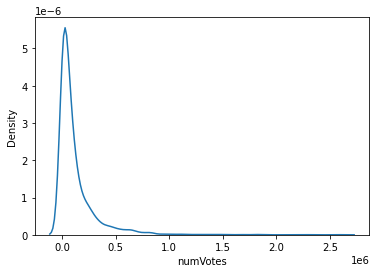

In [ ]:
sns.kdeplot(data=movies_ratings, x="numVotes")

In [ ]:
movies_ratings.numVotes.value_counts(dropna=False)

NaN         18
8.0          6
17.0         4
72.0         4
69.0         3
            ..
272915.0     1
46624.0      1
1128.0       1
650414.0     1
21.0         1
Name: numVotes, Length: 3488, dtype: int64

In [ ]:
movies_ratings.numVotes.describe()

count    3.557000e+03
mean     1.231259e+05
std      1.926534e+05
min      8.000000e+00
25%      1.705000e+04
50%      5.647700e+04
75%      1.438470e+05
max      2.612004e+06
Name: numVotes, dtype: float64

In [ ]:
movies_ratings[movies_ratings.numVotes == movies_ratings.numVotes.max()]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,averageRating,numVotes
1290,557,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008.0,NaN,152.0,"Action,Crime,Drama",155.0,en,185000000.0,1.004558e+09,0.184161,9.0,2612004.0


In [ ]:
movies_ratings[['numVotes']].quantile(.025)

numVotes    124.8
Name: 0.025, dtype: float64

In [ ]:
movies_ratings[movies_ratings.numVotes >= 125]

,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,averageRating,numVotes
0,2,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118.0,"Comedy,Fantasy,Romance",11232.0,en,48000000.0,76019048.0,0.631421,6.4,84717.0
1,40,tt0118589,movie,Glitter,Glitter,0,2001.0,NaN,104.0,"Drama,Music,Romance",10696.0,en,22000000.0,5271666.0,4.173254,2.3,23564.0
2,64,tt0120467,movie,Vulgar,Vulgar,0,2000.0,NaN,87.0,"Crime,Drama,Thriller",19085.0,en,120000.0,14904.0,8.051530,5.2,4137.0
3,71,tt0120667,movie,Fantastic Four,Fantastic Four,0,2005.0,NaN,106.0,"Action,Adventure,Fantasy",9738.0,en,100000000.0,333535934.0,0.299818,5.7,329570.0
4,73,tt0120679,movie,Frida,Frida,0,2002.0,NaN,123.0,"Biography,Drama,Romance",1360.0,en,12000000.0,56298474.0,0.213150,7.3,89938.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,7668,tt8772262,movie,Midsommar,Midsommar,0,2019.0,NaN,148.0,"Drama,Horror,Mystery",530385.0,en,9000000.0,47980982.0,0.187574,7.1,307254.0
3570,9458,tt8946378,movie,Knives Out,Knives Out,0,2019.0,NaN,130.0,"Comedy,Crime,Drama",546554.0,en,40000000.0,309232797.0,0.129352,7.9,609899.0
3571,11434,tt9134216,movie,Playing with Fire,Playing with Fire,0,2019.0,NaN,96.0,"Comedy,Family",554241.0,en,29900000.0,44400000.0,0.673423,5.1,14856.0
3572,1187,tt9285882,movie,Blue Story,Blue Story,0,2019.0,NaN,91.0,"Crime,Drama,Musical",621191.0,en,1600000.0,5750000.0,0.278261,6.2,7228.0
